In [ ]:
import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import pandas as pd

import json

import networkx as nx
from networkx.algorithms.similarity import graph_edit_distance,optimize_graph_edit_distance

In [ ]:
!pip install node2vec

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Graph Similarity Measure between nf_ToN_iot and nf_BoN_iot**

In [ ]:
df_nf_ToN_iot_v1=pd.read_parquet('/content/gdrive/MyDrive/csci-e-599a-2024-cybersecurity/data/parquet/netflow/ip_port/NF-ToN-IoT_chunks')

In [ ]:
df_nf_ToN_iot_v1[df_nf_ToN_iot_v1.duplicated()]

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label
__null_dask_index__,,,,,,,,,,,,,


In [ ]:
# No Duplicates Found

In [ ]:
df_nf_ToN_iot_v1.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label
__null_dask_index__,,,,,,,,,,,,,
0,192.168.1.195,63318,52.139.250.253,443,6,91.00,181,165,2,1,24,327,0
1,192.168.1.79,57442,192.168.1.255,15600,17,0.00,63,0,1,0,0,0,0
2,192.168.1.79,57452,239.255.255.250,15600,17,0.00,63,0,1,0,0,0,0
3,192.168.1.193,138,192.168.1.255,138,17,10.16,472,0,2,0,0,0,0
4,192.168.1.79,51989,192.168.1.255,15600,17,0.00,63,0,1,0,0,0,0


In [ ]:
df_nf_ToN_iot_v1.shape

(846951, 13)

In [ ]:
df_nf_BoT_iot_v1=pd.read_parquet('/content/gdrive/MyDrive/csci-e-599a-2024-cybersecurity/data/parquet/netflow/ip_port/NF-BoT-IoT_chunks')

In [ ]:
df_nf_BoT_iot_v1[df_nf_BoT_iot_v1.duplicated()]

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label
__null_dask_index__,,,,,,,,,,,,,


**No Duplicates Found**

In [ ]:
df_nf_BoT_iot_v1.shape

(510941, 13)

In [ ]:
df_nf_BoT_iot_v1.columns

Index(['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS', 'Label'],
      dtype='object')

In [ ]:
df_nf_BoT_iot_v1=df_nf_BoT_iot_v1[['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS']]

In [ ]:
#Excluding labels for df_nf_BoT_iot_v1

In [ ]:
df_nf_ToN_iot_v1.columns

Index(['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS', 'Label'],
      dtype='object')

In [ ]:
#Excluding labels for df_nf_ToN_iot_v1

In [ ]:
df_nf_ToN_iot_v1=df_nf_ToN_iot_v1[['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS']]

In [ ]:
df_nf_ToN_iot_v1[df_nf_ToN_iot_v1.duplicated()]

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS
__null_dask_index__,,,,,,,,,,,,


In [ ]:
df_NF_ToN_IoT_v2=pd.read_parquet('/content/gdrive/MyDrive/csci-e-599a-2024-cybersecurity/data/parquet/netflow/ip_port/NF-ToN-IoT-v2_chunks')

df_NF_ToN_IoT_v2=df_NF_ToN_IoT_v2[['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS']]

df_NF_ToN_IoT_v2[df_NF_ToN_IoT_v2.duplicated()]

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS
__null_dask_index__,,,,,,,,,,,,


In [ ]:
G1 = nx.from_pandas_edgelist(df_nf_ToN_iot_v1, 'IPV4_SRC_ADDR', 'IPV4_DST_ADDR', create_using=nx.DiGraph(),edge_attr=True)

In [ ]:
G2 = nx.from_pandas_edgelist(df_nf_BoT_iot_v1, 'IPV4_SRC_ADDR', 'IPV4_DST_ADDR', create_using=nx.DiGraph(),edge_attr=True)

**Graph Edit Distance**

In [ ]:
import sys
sys.setrecursionlimit(10000)

In [ ]:
#ged=graph_edit_distance(G1, G2, edge_match=lambda x, y: x.get('PROTOCOL') == y.get('PROTOCOL') and x.get('L7_PROTO') == y.get('L7_PROTO')
 #                        and x.get('IN_BYTES')==y.get('IN_BYTES') and x.get('OUT_BYTES')==y.get('OUT_BYTES') and x.get('IN_PKTS')==y.get('IN_PKTS')
  #                      and x.get('OUT_PKTS')==y.get('OUT_PKTS') and x.get('TCP_FLAGS')==y.get('TCP_FLAGS') and x.get('FLOW_DURATION_MILLISECONDS')==y.get('FLOW_DURATION_MILLISECONDS')
                       #)
#print("Graph Edit Distance:", ged)

Failing due to Memory Issue

**Finding Cosine Similarity for Embeddings Generated from Node2Vec Between Two Graph Set**


1.   df_nf_ToN_iot_v1 and df_nf_BoT_iot_v1
2.   df_nf_ToN_iot_v1 and df_nf_UNSW_NB15





In [ ]:
import networkx as nx
from node2vec import Node2Vec
from sklearn.metrics.pairwise import cosine_similarity


# Train edge2vec model for graph 1
node2vec_model1 = Node2Vec(G1, dimensions=64, walk_length=30, num_walks=200, workers=4)
embeddings1 = node2vec_model1.fit().wv.vectors

# Train edge2vec model for graph 2
node2vec_model2 = Node2Vec(G2, dimensions=64, walk_length=30, num_walks=200, workers=4)
embeddings2 = node2vec_model2.fit().wv.vectors


# Reshape embeddings for cosine similarity calculation
embeddings1 = embeddings1.reshape(-1, embeddings1.shape[1])
embeddings2 = embeddings2.reshape(-1, embeddings2.shape[1])

print(embeddings1.shape)
print(embeddings2.shape)

# Calculate cosine similarity
cosine_sim = cosine_similarity(embeddings1, embeddings2)
average_similarity = np.mean(cosine_sim)


#print(embeddings1)

# Print the cosine similarity matrix
print(cosine_sim)

print("average_similarity",average_similarity)


Computing transition probabilities:   0%|          | 0/1501 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/131 [00:00<?, ?it/s]

(1501, 64)
(131, 64)
[[ 0.19957511  0.1154415   0.1162458  ...  0.06452179  0.13627653
   0.144889  ]
 [ 0.6596274   0.7151078   0.7040744  ...  0.15000822  0.6834394
   0.67115104]
 [ 0.57475334  0.5732146   0.61674166 ... -0.04562362  0.56701684
   0.57667243]
 ...
 [ 0.66271657  0.66422206  0.69372404 ...  0.0452929   0.6503546
   0.669645  ]
 [ 0.64935327  0.648067    0.6789224  ...  0.02704326  0.64253134
   0.65604526]
 [ 0.12778968  0.08542088  0.0817363  ...  0.03786392  0.1362953
   0.10914801]]
average_similarity 0.46297112


In [ ]:
df_nf_UNSW_NB15=pd.read_parquet('/content/gdrive/MyDrive/csci-e-599a-2024-cybersecurity/data/parquet/netflow/ip_port/NF-UNSW-NB15_chunks')

In [ ]:
df_nf_UNSW_NB15.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label
__null_dask_index__,,,,,,,,,,,,,
0,149.171.126.0,62073,59.166.0.5,56082,6,0.0,9672,416,11,8,25,15,0
1,149.171.126.2,32284,59.166.0.5,1526,6,0.0,1776,104,6,2,25,0,0
2,149.171.126.0,21,59.166.0.1,21971,6,1.0,1842,1236,26,22,25,1111,0
3,59.166.0.1,23800,149.171.126.0,46893,6,0.0,528,8824,10,12,27,124,0
4,59.166.0.5,63062,149.171.126.2,21,6,1.0,1786,2340,32,34,25,1459,0


In [ ]:
df_nf_UNSW_NB15.columns

Index(['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS', 'Label'],
      dtype='object')

In [ ]:
df_nf_UNSW_NB15=df_nf_UNSW_NB15[['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS']]

In [ ]:
df_nf_UNSW_NB15[df_nf_UNSW_NB15.duplicated()]

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS
__null_dask_index__,,,,,,,,,,,,


In [ ]:
df_NF_BoT_IoT_v2=pd.read_parquet('/content/gdrive/MyDrive/csci-e-599a-2024-cybersecurity/data/parquet/netflow/ip_port/NF-BoT-IoT-v2_chunks')

In [ ]:
df_NF_BoT_IoT_v2.columns

Index(['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS', 'Label'],
      dtype='object')

In [ ]:
df_NF_BoT_IoT_v2=df_NF_BoT_IoT_v2[['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS']]

In [ ]:
df_NF_BoT_IoT_v2[df_NF_BoT_IoT_v2.duplicated()]

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS
__null_dask_index__,,,,,,,,,,,,


In [ ]:
df_NF_UNSW_NB15_v2=pd.read_parquet('/content/gdrive/MyDrive/csci-e-599a-2024-cybersecurity/data/parquet/netflow/ip_port/NF-UNSW-NB15-v2_chunks')

In [ ]:
df_NF_UNSW_NB15_v2=df_NF_UNSW_NB15_v2[['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS']]

In [ ]:
df_NF_UNSW_NB15_v2[df_NF_UNSW_NB15_v2.duplicated()]

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS
__null_dask_index__,,,,,,,,,,,,


In [ ]:
df_NF_UQ_NIDS_v1=pd.read_parquet('/content/gdrive/MyDrive/csci-e-599a-2024-cybersecurity/data/parquet/netflow/ip_port/NF-UQ-NIDS_chunks')

In [ ]:
df_NF_UQ_NIDS_v1=df_NF_UQ_NIDS_v1[['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS']]

In [ ]:
df_NF_UQ_NIDS_v1[df_NF_UQ_NIDS_v1.duplicated()]

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS
__null_dask_index__,,,,,,,,,,,,


In [ ]:
G3 = nx.from_pandas_edgelist(df_nf_UNSW_NB15, 'IPV4_SRC_ADDR', 'IPV4_DST_ADDR', create_using=nx.DiGraph(),edge_attr=True)

**Graph2Vec for Generating Embeddings**

In [ ]:
!git clone https://github.com/benedekrozemberczki/graph2vec

Cloning into 'graph2vec'...
remote: Enumerating objects: 332, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 332 (delta 47), reused 37 (delta 37), pack-reused 277
Receiving objects: 100% (332/332), 219.49 KiB | 877.00 KiB/s, done.
Resolving deltas: 100% (147/147), done.


In [ ]:
%cd graph2vec

/content/graph2vec


In [ ]:
import os

directory = 'new_data'
os.makedirs(directory)


**Handle the dataframe to JSON object**

In [ ]:
import pandas as pd
import json

features={}
edges=[]


for _, row in df_nf_BoT_iot_v1.iterrows():
    edge_list=[]
    edge_attr={}
    edge_list.append(str(row['IPV4_SRC_ADDR'])+":"+str(row['L4_SRC_PORT']))
    edge_list.append(str(row['IPV4_DST_ADDR'])+":"+str(row['L4_DST_PORT']))

    edge_attr['PROTOCOL']=row['PROTOCOL']
    edge_attr['L7_PROTO']=row['L7_PROTO']
    edge_attr['IN_BYTES']=row['IN_BYTES']
    edge_attr['OUT_BYTES']=row['OUT_BYTES']
    edge_attr['IN_PKTS']=row['IN_PKTS']
    edge_attr['OUT_PKTS']=row['OUT_PKTS']
    edge_attr['TCP_FLAGS']=row['TCP_FLAGS']
    edge_attr['FLOW_DURATION_MILLISECONDS']=row['FLOW_DURATION_MILLISECONDS']
    edge_list.append(edge_attr)
    edges.append(edge_list)

# Construct JSON object
network_data1 = {
    'edges': edges
}

# Write JSON to file
with open('new_data/bot_iot_v1.json', 'w') as f:
    json.dump(network_data1, f, indent=4)


In [ ]:
df_NF_UNSW_NB15_v2.shape

(2354353, 12)

In [ ]:
#df_NF_UQ_NIDS_v1
features={}
edges=[]



for _, row in df_NF_UQ_NIDS_v1.iterrows():
    edge_list=[]
    edge_attr={}
    edge_list.append(str(row['IPV4_SRC_ADDR'])+":"+str(row['L4_SRC_PORT']))
    edge_list.append(str(row['IPV4_DST_ADDR'])+":"+str(row['L4_DST_PORT']))

    edge_attr['PROTOCOL']=row['PROTOCOL']
    edge_attr['L7_PROTO']=row['L7_PROTO']
    edge_attr['IN_BYTES']=row['IN_BYTES']
    edge_attr['OUT_BYTES']=row['OUT_BYTES']
    edge_attr['IN_PKTS']=row['IN_PKTS']
    edge_attr['OUT_PKTS']=row['OUT_PKTS']
    edge_attr['TCP_FLAGS']=row['TCP_FLAGS']
    edge_attr['FLOW_DURATION_MILLISECONDS']=row['FLOW_DURATION_MILLISECONDS']
    edge_list.append(edge_attr)
    edges.append(edge_list)

# Construct JSON object
network_UNSW_NB15_v2 = {
    'edges': edges
}

# Write JSON to file
with open('new_data/nf_uq_nids_v1.json', 'w') as f:
    json.dump(network_UNSW_NB15_v2, f, indent=4)


In [ ]:
#NF_ToN_IoT_v2

features={}
edges=[]

for _, row in df_NF_ToN_IoT_v2.iterrows():
    edge_list=[]
    edge_attr={}
    edge_list.append(str(row['IPV4_SRC_ADDR'])+":"+str(row['L4_SRC_PORT']))
    edge_list.append(str(row['IPV4_DST_ADDR'])+":"+str(row['L4_DST_PORT']))

    edge_attr['PROTOCOL']=row['PROTOCOL']
    edge_attr['L7_PROTO']=row['L7_PROTO']
    edge_attr['IN_BYTES']=row['IN_BYTES']
    edge_attr['OUT_BYTES']=row['OUT_BYTES']
    edge_attr['IN_PKTS']=row['IN_PKTS']
    edge_attr['OUT_PKTS']=row['OUT_PKTS']
    edge_attr['TCP_FLAGS']=row['TCP_FLAGS']
    edge_attr['FLOW_DURATION_MILLISECONDS']=row['FLOW_DURATION_MILLISECONDS']
    edge_list.append(edge_attr)
    edges.append(edge_list)

# Construct JSON object
network_UNSW_NB15_v2 = {
    'edges': edges
}

# Write JSON to file
with open('new_data/NF_ToN_IoT_v2.json', 'w') as f:
    json.dump(network_UNSW_NB15_v2, f, indent=4)


In [ ]:
#UNSW-NB15-v2
features={}
edges=[]



for _, row in df_NF_UNSW_NB15_v2.iterrows():
    edge_list=[]
    edge_attr={}
    edge_list.append(str(row['IPV4_SRC_ADDR'])+":"+str(row['L4_SRC_PORT']))
    edge_list.append(str(row['IPV4_DST_ADDR'])+":"+str(row['L4_DST_PORT']))

    edge_attr['PROTOCOL']=row['PROTOCOL']
    edge_attr['L7_PROTO']=row['L7_PROTO']
    edge_attr['IN_BYTES']=row['IN_BYTES']
    edge_attr['OUT_BYTES']=row['OUT_BYTES']
    edge_attr['IN_PKTS']=row['IN_PKTS']
    edge_attr['OUT_PKTS']=row['OUT_PKTS']
    edge_attr['TCP_FLAGS']=row['TCP_FLAGS']
    edge_attr['FLOW_DURATION_MILLISECONDS']=row['FLOW_DURATION_MILLISECONDS']
    edge_list.append(edge_attr)
    edges.append(edge_list)

# Construct JSON object
network_UNSW_NB15_v2 = {
    'edges': edges
}

# Write JSON to file
with open('new_data/unsw_nb15_v2.json', 'w') as f:
    json.dump(network_UNSW_NB15_v2, f, indent=4)


In [ ]:
import pandas as pd
import json

features={}
edges=[]



for _, row in df_nf_ToN_iot_v1.iterrows():
    edge_list=[]
    edge_attr={}
    edge_list.append(str(row['IPV4_SRC_ADDR'])+":"+str(row['L4_SRC_PORT']))
    edge_list.append(str(row['IPV4_DST_ADDR'])+":"+str(row['L4_DST_PORT']))

    edge_attr['PROTOCOL']=row['PROTOCOL']
    edge_attr['L7_PROTO']=row['L7_PROTO']
    edge_attr['IN_BYTES']=row['IN_BYTES']
    edge_attr['OUT_BYTES']=row['OUT_BYTES']
    edge_attr['IN_PKTS']=row['IN_PKTS']
    edge_attr['OUT_PKTS']=row['OUT_PKTS']
    edge_attr['TCP_FLAGS']=row['TCP_FLAGS']
    edge_attr['FLOW_DURATION_MILLISECONDS']=row['FLOW_DURATION_MILLISECONDS']
    edge_list.append(edge_attr)
    edges.append(edge_list)

# Construct JSON object
network_data = {
    'edges': edges
}

# Write JSON to file
with open('new_data/nf_ToN_iot_v1.json', 'w') as f:
    json.dump(network_data, f, indent=4)


In [ ]:
import pandas as pd
import json

features={}
edges=[]



for _, row in df_nf_UNSW_NB15.iterrows():
    edge_list=[]
    edge_attr={}
    edge_list.append(str(row['IPV4_SRC_ADDR'])+":"+str(row['L4_SRC_PORT']))
    edge_list.append(str(row['IPV4_DST_ADDR'])+":"+str(row['L4_DST_PORT']))

    edge_attr['PROTOCOL']=row['PROTOCOL']
    edge_attr['L7_PROTO']=row['L7_PROTO']
    edge_attr['IN_BYTES']=row['IN_BYTES']
    edge_attr['OUT_BYTES']=row['OUT_BYTES']
    edge_attr['IN_PKTS']=row['IN_PKTS']
    edge_attr['OUT_PKTS']=row['OUT_PKTS']
    edge_attr['TCP_FLAGS']=row['TCP_FLAGS']
    edge_attr['FLOW_DURATION_MILLISECONDS']=row['FLOW_DURATION_MILLISECONDS']
    edge_list.append(edge_attr)
    edges.append(edge_list)

# Construct JSON object
network_data2 = {
    'edges': edges
}

# Write JSON to file
with open('new_data/nf_UNSW_NB15_v1.json', 'w') as f:
    json.dump(network_data, f, indent=4)


In [ ]:
import os

directory = 'new_data/bot_iot_v1'
os.makedirs(directory)

In [ ]:
%pwd

'/content/graph2vec'

In [ ]:
!python src/graph2vec.py --input-path new_data/ --output-path features/nci2.csv


Feature extraction started.

100% 6/6 [00:00<00:00, 184.06it/s]

Optimization started.

/content/graph2vec/src/graph2vec.py:104: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  out.append([identifier] + list(model.docvecs["g_"+identifier]))


In [ ]:
import pandas as pd

embeddings_df=pd.read_csv("features/nci2.csv")
embeddings_df

,type,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,...,x_118,x_119,x_120,x_121,x_122,x_123,x_124,x_125,x_126,x_127
0,NF_ToN_IoT_v2,-0.303947,-1.737062,-1.201185,1.819792,0.740384,1.200851,-2.049470,-1.039871,-1.637917,...,1.131646,2.911946,1.907766,-0.116014,-2.629317,1.677808,-4.158380,-0.221595,-2.610266,1.121999
1,bot_iot_v1,-0.960675,-2.361152,-1.746653,2.159777,0.832145,0.911524,-2.814665,-1.387188,-2.210372,...,0.473016,2.273377,0.862756,0.383875,-2.504242,0.706941,-2.417367,-0.080539,-1.554195,0.458672
2,nf_ToN_iot_v1,-1.053287,-1.444735,-2.008282,1.840859,0.731647,0.177059,-2.200918,-1.135390,-2.035257,...,0.710949,1.851249,1.703289,1.124620,-1.537249,1.627095,-2.116629,0.096270,-1.432686,-0.027402
3,nf_UNSW_NB15_v1,-1.084433,-1.625323,-2.004220,1.779969,0.586781,0.020655,-2.348096,-1.191971,-1.918206,...,0.459936,1.871540,1.341120,1.076788,-1.598973,1.259327,-1.869906,0.067243,-1.160454,-0.072503
4,nf_uq_nids_v1,-0.925723,-1.153840,-1.857280,1.698184,0.736255,0.206026,-1.885252,-0.990374,-1.893235,...,0.846504,1.733844,1.898213,1.088437,-1.341416,1.832156,-2.192770,0.105380,-1.526896,0.005895
5,unsw_nb15_v2,-0.942290,-1.200961,-1.858282,1.760293,0.800453,0.311488,-1.920119,-1.006151,-1.976792,...,0.867792,1.700780,1.869766,1.065753,-1.379586,1.803951,-2.167306,0.110983,-1.549843,0.020683


In [ ]:
graph_names= embeddings_df['type'].tolist()

In [ ]:
embeddings_df=embeddings_df.drop('type',axis=1)

In [ ]:
embeddings_df.head()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_118,x_119,x_120,x_121,x_122,x_123,x_124,x_125,x_126,x_127
0,-0.303947,-1.737062,-1.201185,1.819792,0.740384,1.200851,-2.049470,-1.039871,-1.637917,1.021189,...,1.131646,2.911946,1.907766,-0.116014,-2.629317,1.677808,-4.158380,-0.221595,-2.610266,1.121999
1,-0.960675,-2.361152,-1.746653,2.159777,0.832145,0.911524,-2.814665,-1.387188,-2.210372,0.780241,...,0.473016,2.273377,0.862756,0.383875,-2.504242,0.706941,-2.417367,-0.080539,-1.554195,0.458672
2,-1.053287,-1.444735,-2.008282,1.840859,0.731647,0.177059,-2.200918,-1.135390,-2.035257,0.485894,...,0.710949,1.851249,1.703289,1.124620,-1.537249,1.627095,-2.116629,0.096270,-1.432686,-0.027402
3,-1.084433,-1.625323,-2.004220,1.779969,0.586781,0.020655,-2.348096,-1.191971,-1.918206,0.415161,...,0.459936,1.871540,1.341120,1.076788,-1.598973,1.259327,-1.869906,0.067243,-1.160454,-0.072503
4,-0.925723,-1.153840,-1.857280,1.698184,0.736255,0.206026,-1.885252,-0.990374,-1.893235,0.482520,...,0.846504,1.733844,1.898213,1.088437,-1.341416,1.832156,-2.192770,0.105380,-1.526896,0.005895


In [ ]:
nf_ToN_iot_v2_embeddings = embeddings_df.iloc[0].values
bot_iot_v1_embeddings = embeddings_df.iloc[1].values
nf_ToN_iot_v1_embeddings = embeddings_df.iloc[2].values
nf_UNSW_NB15_v1_embeddings = embeddings_df.iloc[3].values
nf_uq_nids_v1_embeddings = embeddings_df.iloc[4].values
unsw_nb15_v2_embeddings = embeddings_df.iloc[5].values

In [ ]:
# Reshape embeddings to 128 dimensions
nf_ToN_iot_v2_embeddings = nf_ToN_iot_v2_embeddings.reshape(1, -1)
bot_iot_v1_embeddings = bot_iot_v1_embeddings.reshape(1, -1)
nf_ToN_iot_v1_embeddings = nf_ToN_iot_v1_embeddings.reshape(1, -1)
nf_UNSW_NB15_v1_embeddings = nf_UNSW_NB15_v1_embeddings.reshape(1, -1)
nf_uq_nids_v1_embeddings=nf_uq_nids_v1_embeddings.reshape(1, -1)
unsw_nb15_v2_embeddings=unsw_nb15_v2_embeddings.reshape(1, -1)

In [ ]:
df_nf_ToN_iot_v1.shape

(846951, 12)

In [ ]:
df_nf_BoT_iot_v1.shape

(510941, 12)

In [ ]:
df_nf_UNSW_NB15.shape

(1593097, 12)

**Graph Clustering**

In [ ]:
# With Port in the edge list

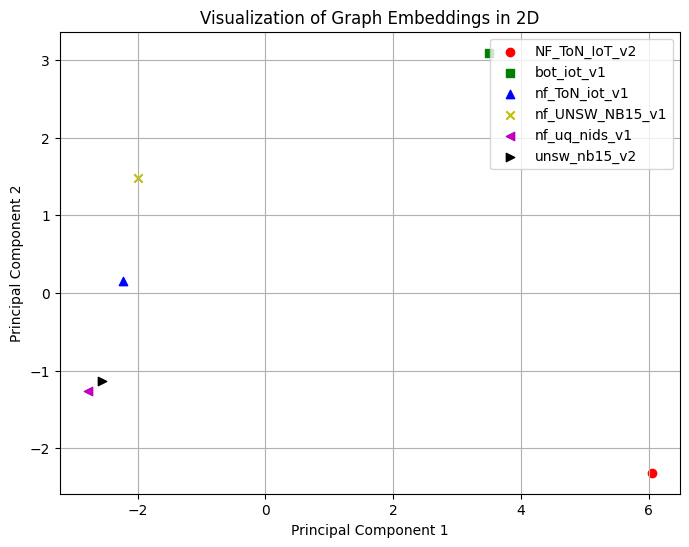

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Perform dimensionality reduction using PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings_df.values)

# Plot the embeddings on a 2D scatter plot
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b','y','m','k']  # Define colors for each graph
markers = ['o', 's', '^','x','<','>']  # Define markers for each graph

for i in range(6):
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1], color=colors[i], marker=markers[i], label=graph_names[i])

plt.title('Visualization of Graph Embeddings in 2D')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


**Four graphs nf_uq_nids_v1, UNSW_NB15_v2, nf_ToN_iot_v1: nf_UNSW_NB15_v1 looks closer in the embedding space.**


In [ ]:
embeddings_2d

array([[ 7.12440728, -0.97161583],
       [ 0.85602026,  3.09153836],
       [-1.76657309,  0.0700438 ],
       [-2.27334467, -0.46463041],
       [-1.85018178, -1.09632455],
       [-2.09032801, -0.62901137]])

In [ ]:
directory = 'new_data/noedattr'
os.makedirs(directory)

In [ ]:
import pandas as pd
import json

features={}
edges=[]

for _, row in df_nf_BoT_iot_v1.iterrows():
    edge_list=[]

    edge_list.append(str(row['IPV4_SRC_ADDR'])+":"+str(row['L4_SRC_PORT']))
    edge_list.append(str(row['IPV4_DST_ADDR'])+":"+str(row['L4_DST_PORT']))
    edges.append(edge_list)

# Construct JSON object
network_data1 = {
    'edges': edges
}

# Write JSON to file
with open('new_data/noedattr/bot_iot_v1_noedattr.json', 'w') as f:
    json.dump(network_data1, f, indent=4)


In [ ]:
import pandas as pd
import json

features={}
edges=[]

for _, row in df_NF_ToN_IoT_v2.iterrows():
    edge_list=[]

    edge_list.append(str(row['IPV4_SRC_ADDR'])+":"+str(row['L4_SRC_PORT']))
    edge_list.append(str(row['IPV4_DST_ADDR'])+":"+str(row['L4_DST_PORT']))
    edges.append(edge_list)

# Construct JSON object
network_data1 = {
    'edges': edges
}

# Write JSON to file
with open('new_data/noedattr/nf_ton_iot_v2_noedattr.json', 'w') as f:
    json.dump(network_data1, f, indent=4)

In [ ]:
#df_NF_UQ_NIDS_v1
features={}
edges=[]

for _, row in df_NF_UQ_NIDS_v1.iterrows():
    edge_list=[]

    edge_list.append(str(row['IPV4_SRC_ADDR'])+":"+str(row['L4_SRC_PORT']))
    edge_list.append(str(row['IPV4_DST_ADDR'])+":"+str(row['L4_DST_PORT']))
    edges.append(edge_list)

# Construct JSON object
network_UNSW_NB15_v2 = {
    'edges': edges
}

# Write JSON to file
with open('new_data/noedattr/nf_uq_nids_v1_noedattr.json', 'w') as f:
    json.dump(network_UNSW_NB15_v2, f, indent=4)


In [ ]:
#UNSW-NB15-v2
features={}
edges=[]


for _, row in df_NF_UNSW_NB15_v2.iterrows():
    edge_list=[]

    edge_list.append(str(row['IPV4_SRC_ADDR'])+":"+str(row['L4_SRC_PORT']))
    edge_list.append(str(row['IPV4_DST_ADDR'])+":"+str(row['L4_DST_PORT']))

    edges.append(edge_list)

# Construct JSON object
network_UNSW_NB15_v2 = {
    'edges': edges
}

# Write JSON to file
with open('new_data/noedattr/unsw_nb15_v2_noedattr.json', 'w') as f:
    json.dump(network_UNSW_NB15_v2, f, indent=4)


In [ ]:
import pandas as pd
import json

features={}
edges=[]


for _, row in df_nf_ToN_iot_v1.iterrows():
    edge_list=[]

    edge_list.append(str(row['IPV4_SRC_ADDR'])+":"+str(row['L4_SRC_PORT']))
    edge_list.append(str(row['IPV4_DST_ADDR'])+":"+str(row['L4_DST_PORT']))
    edges.append(edge_list)

# Construct JSON object
network_data = {
    'edges': edges
}

# Write JSON to file
with open('new_data/noedattr/nf_ToN_iot_v1.json', 'w') as f:
    json.dump(network_data, f, indent=4)


In [ ]:
import pandas as pd
import json

features={}
edges=[]


for _, row in df_nf_UNSW_NB15.iterrows():
    edge_list=[]

    edge_list.append(str(row['IPV4_SRC_ADDR'])+":"+str(row['L4_SRC_PORT']))
    edge_list.append(str(row['IPV4_DST_ADDR'])+":"+str(row['L4_DST_PORT']))

    edges.append(edge_list)

# Construct JSON object
network_data2 = {
    'edges': edges
}

# Write JSON to file
with open('new_data/noedattr/nf_UNSW_NB15_v1.json', 'w') as f:
    json.dump(network_data, f, indent=4)


In [ ]:
!python src/graph2vec.py --input-path new_data/noedattr/ --output-path features/nc_noedge_embeddings.csv


Feature extraction started.

100% 6/6 [00:00<00:00, 155.85it/s]

Optimization started.

/content/graph2vec/src/graph2vec.py:104: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  out.append([identifier] + list(model.docvecs["g_"+identifier]))


In [ ]:
import pandas as pd

embeddings_df=pd.read_csv("features/nc_noedge_embeddings.csv")
embeddings_df

,type,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,...,x_118,x_119,x_120,x_121,x_122,x_123,x_124,x_125,x_126,x_127
0,bot_iot_v1_noedattr,-0.875313,-2.358069,-1.655853,2.092384,0.746238,0.807483,-2.905428,-1.450376,-2.098993,...,0.412554,2.473645,0.892233,0.060938,-2.582967,0.724414,-2.767912,-0.248134,-1.721418,0.655095
1,nf_ToN_iot_v1,-1.044660,-1.463969,-2.001067,1.836930,0.722517,0.189969,-2.195407,-1.129117,-2.013843,...,0.712082,1.873703,1.691791,1.137887,-1.564173,1.613292,-2.143226,0.106837,-1.437970,-0.028959
2,nf_UNSW_NB15_v1,-0.986404,-1.713420,-1.830970,1.721119,0.558116,0.193021,-2.263505,-1.128250,-1.788268,...,0.495361,2.072905,1.266213,1.053949,-1.894959,1.160506,-2.178935,0.094773,-1.335760,0.002680
3,nf_ton_iot_v2_noedattr,-0.172044,-1.586004,-1.154492,1.992695,1.007692,1.718476,-1.783867,-0.910954,-1.838803,...,1.270413,2.034987,1.707949,-0.490821,-1.951335,1.495177,-3.087922,-0.165029,-2.030784,1.259978
4,nf_uq_nids_v1_noedattr,-1.008017,-1.435509,-1.899069,1.757921,0.685476,0.173362,-2.148936,-1.104878,-1.933235,...,0.628008,1.767304,1.535606,1.026252,-1.496294,1.462391,-2.002225,0.074960,-1.345940,-0.016927
5,unsw_nb15_v2_noedattr,-1.007796,-1.292493,-1.951080,1.825074,0.791162,0.226895,-2.099169,-1.100634,-2.058940,...,0.757727,1.636333,1.755384,0.982112,-1.306371,1.693350,-1.992133,0.059228,-1.417791,0.021873


In [ ]:
graph_names= embeddings_df['type'].tolist()
embeddings_df=embeddings_df.drop('type',axis=1)

In [ ]:
bot_iot_v1_embeddings = embeddings_df.iloc[0].values
nf_ToN_iot_v1_embeddings = embeddings_df.iloc[1].values
nf_UNSW_NB15_v1_embeddings = embeddings_df.iloc[2].values
nf_ToN_iot_v2_embeddings = embeddings_df.iloc[3].values
nf_uq_nids_v1_embeddings = embeddings_df.iloc[4].values
unsw_nb15_v2_embeddings = embeddings_df.iloc[5].values


In [ ]:
# Reshape embeddings to 128 dimensions
bot_iot_v1_embeddings = bot_iot_v1_embeddings.reshape(1, -1)
nf_ToN_iot_v1_embeddings = nf_ToN_iot_v1_embeddings.reshape(1, -1)
nf_UNSW_NB15_v1_embeddings = nf_UNSW_NB15_v1_embeddings.reshape(1, -1)
nf_uq_nids_v1_embeddings=nf_uq_nids_v1_embeddings.reshape(1, -1)
unsw_nb15_v2_embeddings=unsw_nb15_v2_embeddings.reshape(1, -1)
nf_ToN_iot_v2_embeddings = nf_ToN_iot_v2_embeddings.reshape(1, -1)

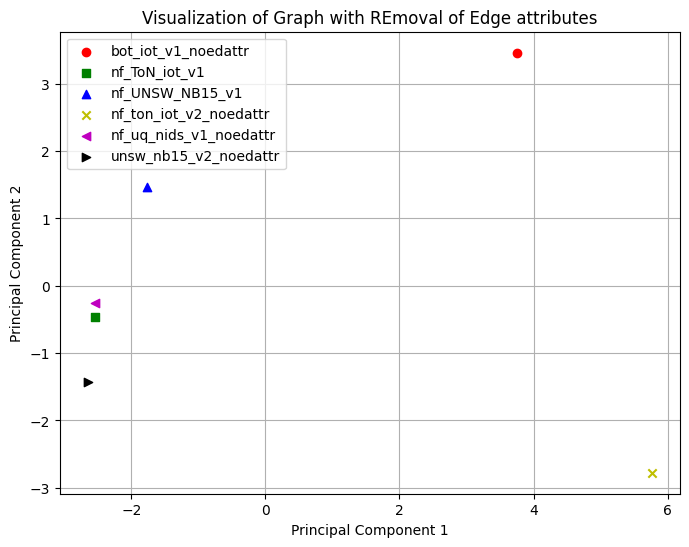

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Perform dimensionality reduction using PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings_df.values)

# Plot the embeddings on a 2D scatter plot
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b','y','m','k']  # Define colors for each graph
markers = ['o', 's', '^','x','<','>']  # Define markers for each graph

for i in range(6):
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1], color=colors[i], marker=markers[i], label=graph_names[i])

plt.title('Visualization of Graph with REmoval of Edge attributes' )
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


**Original Graph**

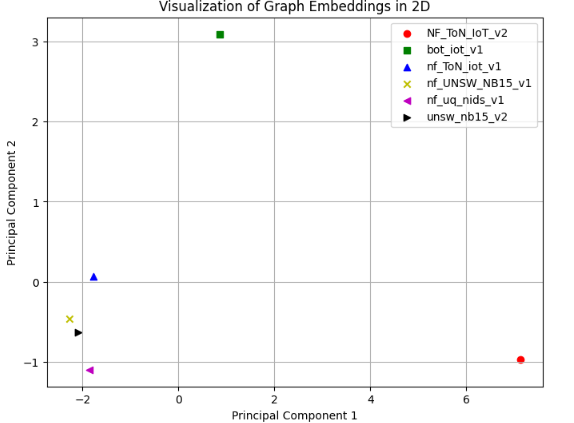

**After removing the edge attributes, I could observe the graphs are similar in the embedding space**
**Four graphs nf_uq_nids_v1, UNSW_NB15_v2, nf_ToN_iot_v1: nf_UNSW_NB15_v1 looks closer in the embedding space.**

In [ ]:
df = pd.read_json('new_data/bot_iot_v1.json')

# Flatten the nested structure
df_flat = pd.DataFrame(df['edges'].tolist(), columns=['source', 'target', 'attributes'])

# Convert the attributes column to a DataFrame
df_attributes = pd.json_normalize(df_flat['attributes'])

# Concatenate the source, target, and attributes DataFrames
df_final = pd.concat([df_flat[['source', 'target']], df_attributes], axis=1)

# Write the DataFrame to a Parquet file
df_final.to_parquet('parquet/output.parquet', index=False)

In [ ]:
import pandas as pd

# Read the Parquet file into a DataFrame
df = pd.read_parquet('parquet/output.parquet')

# Extract 'source' and 'target' columns
edges_json = df[['source', 'target']].values.tolist()

# Convert the remaining columns to a list of dictionaries
attributes = df.drop(['source', 'target'], axis=1).to_dict(orient='records')

# Combine 'source', 'target', and attributes into a single list
for i in range(len(edges_json)):
    edges_json[i].append(attributes[i])

# Convert the list to a JSON formatted string
json_str = json.dumps({"edges": edges_json})

# Write the JSON formatted string to a file
with open('output.json', 'w') as f:
    f.write(json_str)

#Self Similarity Test

In [ ]:
pwd

'/content/graph2vec'

In [ ]:
directory = 'testsimilarity'
os.makedirs(directory)

In [ ]:
def generate_embeddings(samples):
  for i in range(len(samples)):
    edges=[]
    for _, row in samples[i].iterrows():
      edge_list=[]
      edge_attr={}
      edge_list.append(row['src_id'])
      edge_list.append(row['dst_id'])

      edge_attr['PROTOCOL']=row['PROTOCOL']
      edge_attr['L7_PROTO']=row['L7_PROTO']
      edge_attr['IN_BYTES']=row['IN_BYTES']
      edge_attr['OUT_BYTES']=row['OUT_BYTES']
      edge_attr['IN_PKTS']=row['IN_PKTS']
      edge_attr['OUT_PKTS']=row['OUT_PKTS']
      edge_attr['TCP_FLAGS']=row['TCP_FLAGS']
      edge_attr['FLOW_DURATION_MILLISECONDS']=row['FLOW_DURATION_MILLISECONDS']
      edge_list.append(edge_attr)
      edges.append(edge_list)

    # Construct JSON object
    network_data = {
        'edges': edges
    }

    # Write JSON to file
    fileName='sample'+str(i)+'.json'
    with open('testsimilarity/'+fileName, 'w') as f:
      json.dump(network_data, f, indent=4)

  # Calculate Embeddings
  !python src/graph2vec.py --input-path testsimilarity/ --output-path features/testsimilarity_embeddings.csv


In [ ]:
raw_data=df_nf_BoT_iot_v1

In [ ]:
raw_data['src_id'] = raw_data['IPV4_SRC_ADDR'].astype(str) + ":" + raw_data['L4_SRC_PORT'].astype(str)
raw_data['dst_id'] = raw_data['IPV4_DST_ADDR'].astype(str) + ":" + raw_data['L4_DST_PORT'].astype(str)
raw_data.drop(['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT'], axis=1, inplace=True)

In [ ]:
raw_data.head()

,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,src_id,dst_id
__null_dask_index__,,,,,,,,,,
0,17,5.212,71,126,1,1,0,4294966,192.168.100.6:52670,192.168.100.1:53
1,6,0.000,217753000,199100,4521,4049,24,4176249,192.168.100.6:49160,192.168.100.149:4444
2,17,0.000,8508021,8918372,9086,9086,0,4175916,192.168.100.46:3456,192.168.100.5:80
3,6,7.000,8442138,9013406,9086,9086,0,4175916,192.168.100.3:80,192.168.100.55:8080
4,6,7.000,8374706,0,9086,0,0,4175916,192.168.100.46:80,192.168.100.5:80


In [ ]:
samples = [raw_data] + [raw_data.sample(frac=0.3, replace=True, random_state = seed) for seed in range(10)]

In [ ]:
samples[0].head()

,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,src_id,dst_id
__null_dask_index__,,,,,,,,,,
0,17,5.212,71,126,1,1,0,4294966,192.168.100.6:52670,192.168.100.1:53
1,6,0.000,217753000,199100,4521,4049,24,4176249,192.168.100.6:49160,192.168.100.149:4444
2,17,0.000,8508021,8918372,9086,9086,0,4175916,192.168.100.46:3456,192.168.100.5:80
3,6,7.000,8442138,9013406,9086,9086,0,4175916,192.168.100.3:80,192.168.100.55:8080
4,6,7.000,8374706,0,9086,0,0,4175916,192.168.100.46:80,192.168.100.5:80


In [ ]:
samples = [raw_data] + [raw_data.sample(frac=0.3, replace=True, random_state = seed) for seed in range(10)]
simil= generate_embeddings(samples)


Feature extraction started.

100% 11/11 [00:02<00:00,  4.51it/s]

Optimization started.

/content/graph2vec/src/graph2vec.py:104: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  out.append([identifier] + list(model.docvecs["g_"+identifier]))


In [ ]:
#Read the Embeddings Generated CSV File

In [ ]:
embeddings_df=pd.read_csv("features/testsimilarity_embeddings.csv")
embeddings_df.head()

,type,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,...,x_118,x_119,x_120,x_121,x_122,x_123,x_124,x_125,x_126,x_127
0,sample0,-0.393728,0.474075,-1.326681,0.770976,-0.246812,-1.334655,0.887003,0.148349,-0.568500,...,1.024739,1.185075,2.498511,0.764192,0.446175,1.919382,-1.160307,0.742988,-1.317082,0.463199
1,sample1,-0.966182,0.129986,-0.648888,-0.021642,1.025127,-0.119198,-1.665183,-1.258067,-1.625477,...,-0.242531,0.666273,1.100919,0.895443,-0.165884,1.621161,-0.952617,-0.775401,-1.493196,-0.507937
2,sample10,-0.275255,-0.176553,-0.461213,0.602046,0.613974,0.220843,-0.543940,-0.598043,-0.272319,...,0.461339,0.985826,1.800460,0.165816,-1.148600,1.932174,-1.786982,0.022969,-1.641718,-0.253958
3,sample2,-0.135884,-1.164739,-0.522809,0.669247,0.372082,1.137720,-0.007826,-0.602290,-0.363011,...,0.504376,0.735855,0.656349,0.258229,0.373674,0.512893,-0.435441,0.328598,-0.352106,0.033837
4,sample3,-0.619007,-0.222339,-1.459244,0.882700,0.094514,-0.921410,-1.177355,-0.539461,-0.675366,...,0.647478,1.063823,1.538645,0.082704,-0.400959,1.572423,-1.186797,-0.526519,-0.168913,0.185954


In [ ]:
embeddings_df.drop(['type'], axis=1, inplace=True)

In [ ]:
simil=cosine_similarity(embeddings_df)

In [ ]:
type(simil)

numpy.ndarray

In [ ]:
def plot_pairwise_heatmap(simil: np.ndarray, add_mask:bool) -> plt:

  # Mask Upper triangular part
  mask = np.tril(np.ones_like(simil, dtype=bool))

  sns.set(font_scale=1.2)
  plt.figure(figsize=(8, 6))
  sns.heatmap(simil, mask = mask if add_mask else None , annot=True, cmap='coolwarm', fmt='.2f',
              xticklabels=[f"{i+1}" for i in range((simil.shape[0]))],
              yticklabels=[f"{i+1}" for i in range((simil.shape[1]))])
  plt.title('Pairwise Cosine Similarities')
  plt.xlabel('Subgraph')
  plt.ylabel('Subgraph')

  return plt

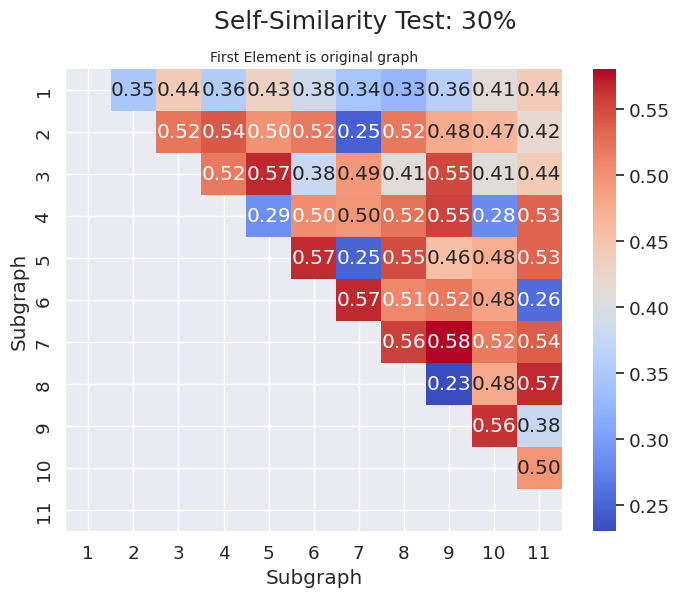

In [ ]:
plot = plot_pairwise_heatmap(simil, True)
plot.suptitle("Self-Similarity Test: 30%", fontsize=18)
plot.title("First Element is original graph", fontsize=10)
plot.show()

In [ ]:
#50% similarity Test

In [ ]:
samples = [raw_data] + [raw_data.sample(frac=0.5, replace=True, random_state = seed) for seed in range(10)]
simil = generate_embeddings(samples)


Feature extraction started.

100% 11/11 [00:03<00:00,  3.07it/s]

Optimization started.

/content/graph2vec/src/graph2vec.py:104: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  out.append([identifier] + list(model.docvecs["g_"+identifier]))


In [ ]:
embeddings_df=pd.read_csv("features/testsimilarity_embeddings.csv")
embeddings_df.head()

,type,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,...,x_118,x_119,x_120,x_121,x_122,x_123,x_124,x_125,x_126,x_127
0,sample0,-0.035376,-1.927477,-1.891385,1.894035,0.015067,0.521539,-0.501415,-0.044135,-0.962202,...,1.370424,1.602723,1.181912,0.155045,-0.563087,0.667326,-1.412314,0.919980,-0.623497,1.148645
1,sample1,-0.701486,-0.324869,-1.153148,0.449434,0.373286,-0.520763,-2.278057,-1.268629,-2.033734,...,-0.445607,1.324873,1.114517,0.651155,-0.695324,1.129147,-1.270272,-0.787897,-1.068565,0.326957
2,sample10,-0.237430,0.139147,-0.201852,0.323347,0.960533,0.598061,-0.433596,-0.741838,-0.838937,...,0.534519,0.609933,1.939086,-0.152301,-0.392847,2.215739,-1.526168,-0.347544,-1.800539,-0.127679
3,sample2,-0.488496,-1.162784,-0.852722,0.510063,0.524130,0.801309,-0.703231,-0.630458,-0.865182,...,0.731763,0.891253,0.717843,0.794377,0.252710,0.912258,-0.329458,-0.189171,-0.002281,-0.223961
4,sample3,-0.100572,-0.533485,-1.281454,1.414388,-0.044421,-0.304626,-1.028523,-0.472368,-0.417283,...,0.559903,1.177898,1.341278,-0.830670,-0.977444,0.980729,-1.870405,-0.148563,-0.560293,0.927182


In [ ]:
embeddings_df_50=embeddings_df.drop(['type'], axis=1)

In [ ]:
simil=cosine_similarity(embeddings_df_50)

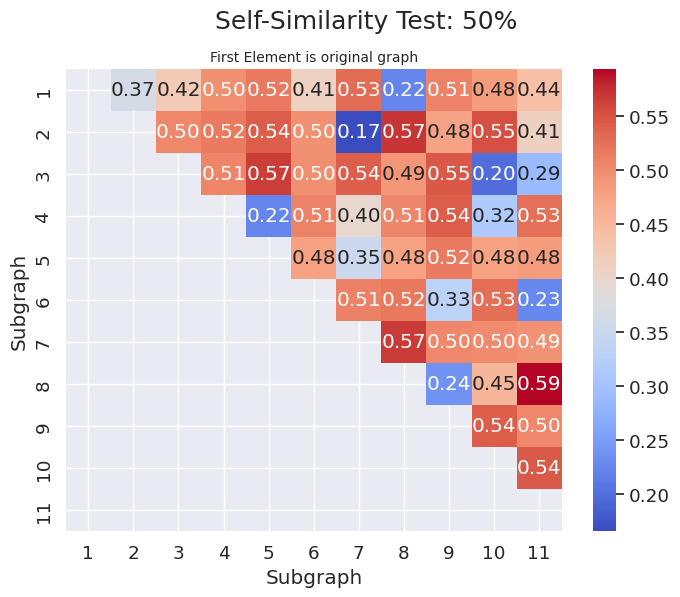

In [ ]:
plot = plot_pairwise_heatmap(simil, True)
plot.suptitle("Self-Similarity Test: 50%", fontsize=18)
plot.title("First Element is original graph", fontsize=10)
plot.show()

In [ ]:
embeddings_df['embedding_all_list'] = embeddings_df_50.apply(lambda row: row.tolist(), axis=1)

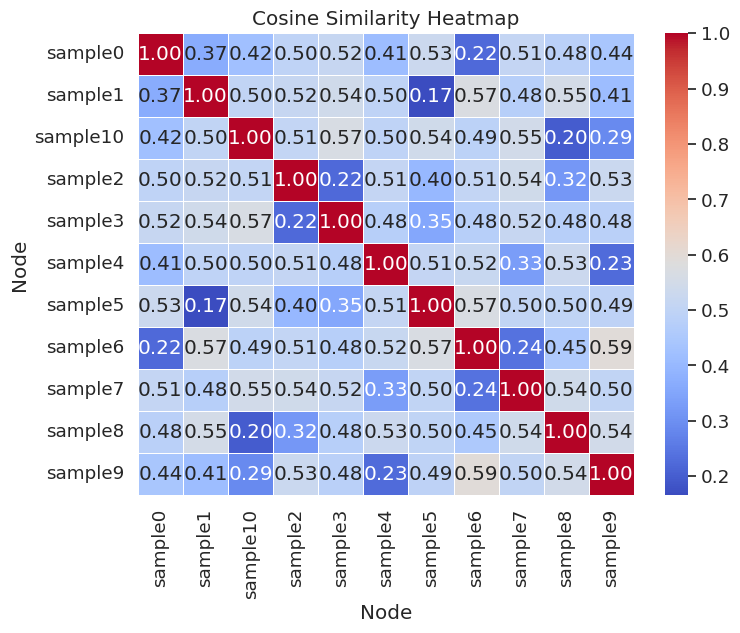

In [ ]:

# Extract embeddings
embeddings = np.array(embeddings_df['embedding_all_list'].tolist())

# Calculate cosine similarity
cos_sim_matrix = cosine_similarity(embeddings, embeddings)


# Create DataFrame from cosine similarity matrix
cos_sim_df = pd.DataFrame(cos_sim_matrix, columns=embeddings_df['type'], index=embeddings_df['type'])

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cos_sim_df, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Cosine Similarity Heatmap')
plt.xlabel('SubGraph')
plt.ylabel('SubGraph')
plt.show()

**Node Drop Test**

In [ ]:
%pwd

'/content/graph2vec'

In [ ]:
directory = 'nodedrop'
os.makedirs(directory)

In [ ]:
df_nf_BoT_iot_v1.head()

,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,src_id,dst_id
__null_dask_index__,,,,,,,,,,
0,17,5.212,71,126,1,1,0,4294966,192.168.100.6:52670,192.168.100.1:53
1,6,0.000,217753000,199100,4521,4049,24,4176249,192.168.100.6:49160,192.168.100.149:4444
2,17,0.000,8508021,8918372,9086,9086,0,4175916,192.168.100.46:3456,192.168.100.5:80
3,6,7.000,8442138,9013406,9086,9086,0,4175916,192.168.100.3:80,192.168.100.55:8080
4,6,7.000,8374706,0,9086,0,0,4175916,192.168.100.46:80,192.168.100.5:80


In [ ]:
def generate_embeddings_nodedrop(samples,fileName):

  features={}
  edges=[]
  for _,row in samples.iterrows():
    edge_list=[]
    edge_attr={}
    edge_list.append(row['src_id'])
    edge_list.append(row['dst_id'])

    edge_attr['PROTOCOL']=row['PROTOCOL']
    edge_attr['L7_PROTO']=row['L7_PROTO']
    edge_attr['IN_BYTES']=row['IN_BYTES']
    edge_attr['OUT_BYTES']=row['OUT_BYTES']
    edge_attr['IN_PKTS']=row['IN_PKTS']
    edge_attr['OUT_PKTS']=row['OUT_PKTS']
    edge_attr['TCP_FLAGS']=row['TCP_FLAGS']
    edge_attr['FLOW_DURATION_MILLISECONDS']=row['FLOW_DURATION_MILLISECONDS']
    edge_list.append(edge_attr)
    edges.append(edge_list)

  # Construct JSON object
  network_data = {
    'edges': edges
  }
  with open('nodedrop/'+fileName+'.json', 'w') as f:
    json.dump(network_data, f, indent=4)


In [ ]:
percentage_to_drop = np.arange(0.0, 1.0, 0.1)
for percentage_to_drop in percentage_to_drop:
    # Randomly select nodes to drop
    #print(percentage_to_drop)
    num_nodes_to_drop = int(len(df_nf_BoT_iot_v1) * percentage_to_drop)
    nodes_to_drop = np.random.choice(df_nf_BoT_iot_v1.index, size=num_nodes_to_drop, replace=False)

    # Drop nodes
    df_subset = df_nf_BoT_iot_v1.drop(nodes_to_drop)

    # Perform analysis or operations on the modified DataFrame
    #print(f"Iteration {i+1}: Number of nodes remaining: {len(df_subset)}")
    fileName='sample'+str(int(percentage_to_drop*100))

    generate_embeddings_nodedrop(df_subset,fileName)




In [ ]:
!python src/graph2vec.py --input-path nodedrop/ --output-path features/similaritytest_nodedrop_embed.csv


Feature extraction started.

100% 10/10 [00:02<00:00,  3.44it/s]

Optimization started.

/content/graph2vec/src/graph2vec.py:104: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  out.append([identifier] + list(model.docvecs["g_"+identifier]))


In [ ]:
nodedrop_embeddings=pd.read_csv("features/similaritytest_nodedrop_embed.csv")
nodedrop_embeddings_df=nodedrop_embeddings
nodedrop_embeddings=nodedrop_embeddings.drop(['type'],axis=1)
nodedrop_embeddings['embedding_all_list'] = nodedrop_embeddings.apply(lambda row: row.tolist(), axis=1)

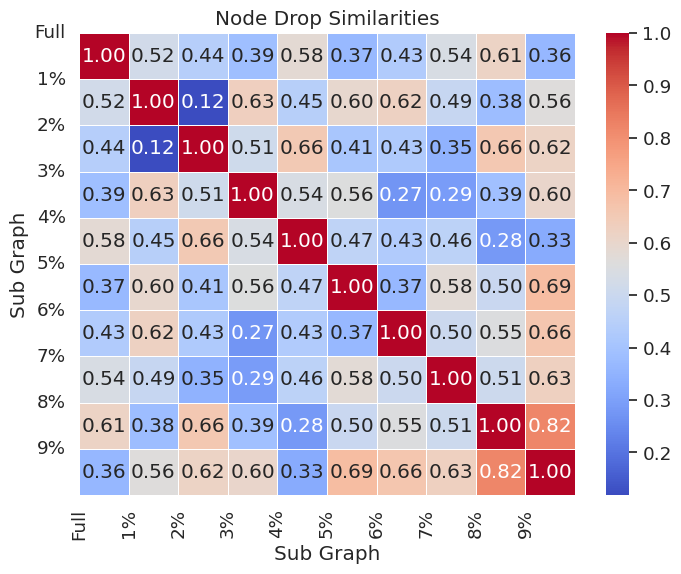

In [ ]:
# Extract embeddings
embeddings = np.array(nodedrop_embeddings['embedding_all_list'].tolist())

# Calculate cosine similarity
cos_sim_matrix = cosine_similarity(embeddings, embeddings)

# Create DataFrame from cosine similarity matrix
cos_sim_df = pd.DataFrame(cos_sim_matrix, columns=nodedrop_embeddings_df['type'], index=nodedrop_embeddings_df['type'])

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cos_sim_df, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Node Drop Similarities')
plt.xlabel('Sub Graph')
plt.ylabel('Sub Graph')
# Define tick positions and labels for x and y axes
ticks = np.arange(0,10, 1) / 100  # 0, 0.1, 0.2, ..., 1.0
labels = [f'{int(t*100)}%' for t in ticks]
labels[0]='Full'

# Set ticks and labels for x and y axes
plt.xticks(ticks=np.arange(0, 10), labels=labels)
plt.yticks(ticks=np.arange(0, 10), labels=labels)


plt.show()

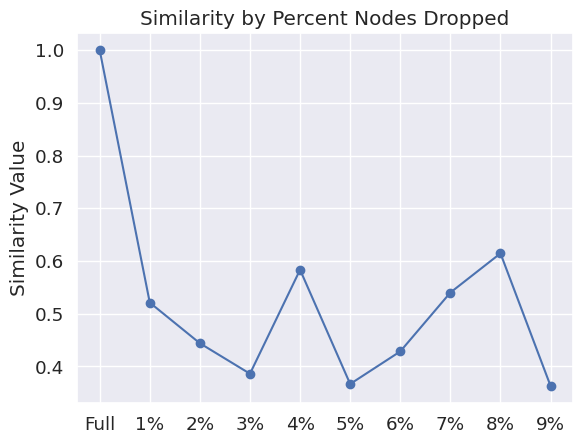

In [ ]:
labels=['Full']+[f'{int(t)}%' for t in list(range(1,10,1))]

# Plot the line graph
plt.plot(labels,list(cos_sim_df.iloc[0]), marker='o', linestyle='-')

# Add labels and title
plt.ylabel('Similarity Value')
plt.title('Similarity by Percent Nodes Dropped')

# Show the plot
plt.grid(True)
plt.show()